In [ ]:
import requests
import pandas as pd
import datetime
# Set your OpenWeatherMap API key
api_key = 'api key'

In [3]:
# Set the location for which you want to retrieve weather data
lat = 18.184135
lon = 74.610764
#https://openweathermap.org/api/one-call-3#howcall
# Construct the API URL
api_url =f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

In [17]:
response = requests.get(api_url)

# --- Step 3: Check if request succeeded ---
if response.status_code != 200:
    print("Error fetching data:", response.text)
else:
    # --- Step 4: Convert JSON to dictionary ---
    weather_data = response.json()

    # --- Step 5: Extract temperature, humidity, and date/time ---
    temperatures = [item['main']['temp'] for item in weather_data['list']]
    humidity = [item['main']['humidity'] for item in weather_data['list']]
    dates = [item['dt_txt'] for item in weather_data['list']]

    # --- Step 6: Create a clean DataFrame ---
    weather_df = pd.DataFrame({
        'Date': dates,
        'Temperature': temperatures,
        'Humidity': humidity
    })

    # --- Step 7: Convert date column to datetime ---
    weather_df['Date'] = pd.to_datetime(weather_df['Date'])

    # --- Step 8: Show first few rows ---
    print("✅ Weather Data Fetched Successfully:")
    print(weather_df.head())

✅ Weather Data Fetched Successfully:
                 Date  Temperature  Humidity
0 2025-11-11 18:00:00       294.88        44
1 2025-11-11 21:00:00       293.26        48
2 2025-11-12 00:00:00       290.64        57
3 2025-11-12 03:00:00       294.03        47
4 2025-11-12 06:00:00       298.95        34


In [18]:
max_temp = weather_df['Temperature'].max()
max_temp
306.38
min_temp = weather_df['Temperature'].min()
min_temp
297.17

297.17

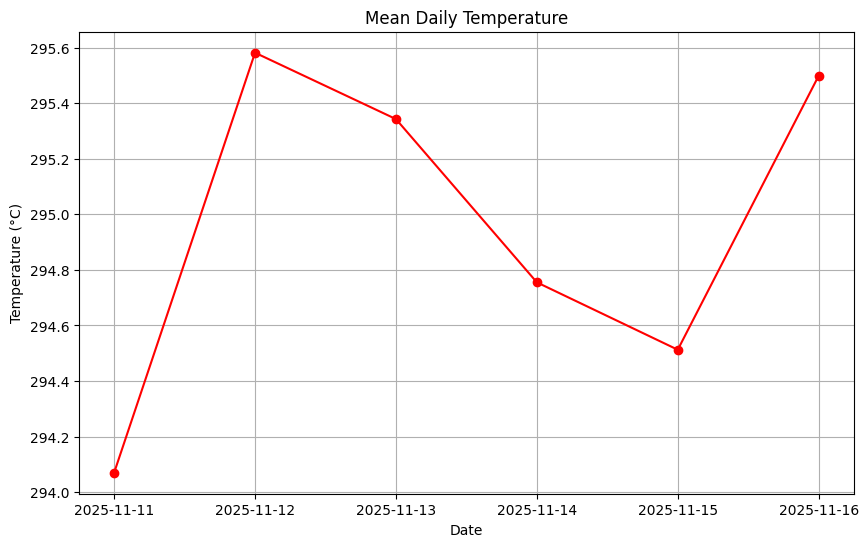

In [24]:
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['Humidity'].resample('D').mean() if 'Humidity' in weather_df.columns else None
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean() if 'wind_speed' in weather_df.columns else None

# 📊 Step 4: Plot Mean Daily Temperature
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_temp.index, daily_mean_temp.values, color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

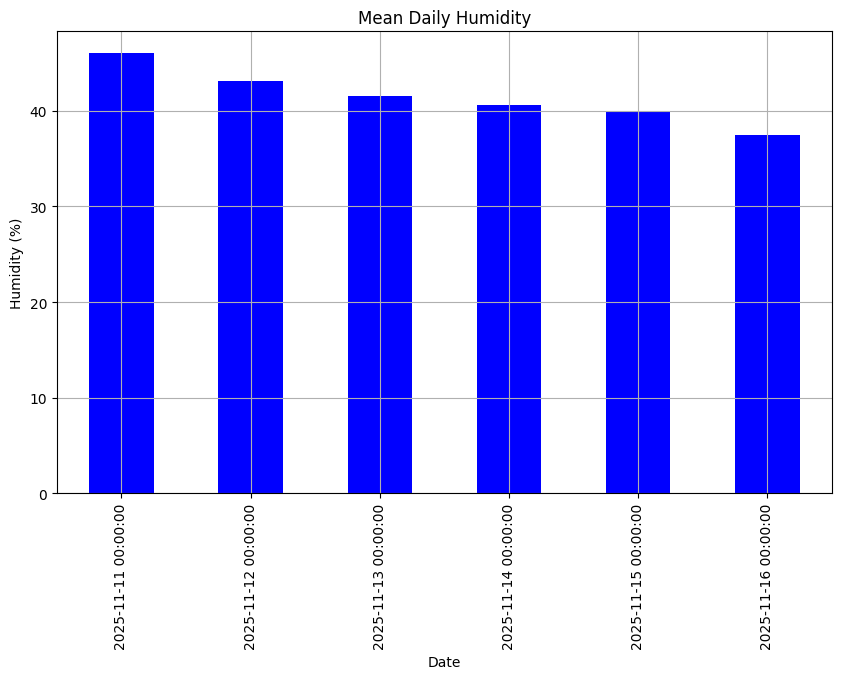

In [20]:
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

In [ ]:
import requests, pandas as pd, folium

api_key = ""
cities = ['London', 'Paris', 'New York']
data = []

for city in cities:
    r = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric").json()
    data.append({
        'City': city,
        'Temp (°C)': r['main']['temp'],
        'Humidity (%)': r['main']['humidity'],
        'Wind (m/s)': r['wind']['speed'],
        'Lat': r['coord']['lat'],
        'Lon': r['coord']['lon']
    })

df = pd.DataFrame(data)
print(df)

m = folium.Map(location=[df['Lat'].mean(), df['Lon'].mean()], zoom_start=2)
for _, x in df.iterrows():
    folium.Marker([x['Lat'], x['Lon']], popup=f"{x['City']}: {x['Temp (°C)']}°C, {x['Humidity (%)']}%").add_to(m)

m.save("weather_map.html")
print("✅ Map saved as weather_map.html")


       City  Temp (°C)  Humidity (%)  Wind (m/s)      Lat      Lon
0    London      14.68            84        5.66  51.5085  -0.1257
1     Paris      15.23            82        5.14  48.8534   2.3488
2  New York       2.81            56        9.39  40.7143 -74.0060
